In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Imorting the required Dependencies 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.layers import Input, Lambda, Dense, Flatten, Activation, Dropout
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras import applications
from keras.callbacks import ModelCheckpoint,EarlyStopping
from PIL import Image
from IPython.display import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns 

2024-09-12 10:54:32.609837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 10:54:32.609952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 10:54:32.747388: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Creating generators to feed input into the 

# Trainning Dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/plant-village-dataset/Plant Village Dataset/Train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

# Validation Dataset
val_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/plant-village-dataset/Plant Village Dataset/Val',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

# Testing Dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/plant-village-dataset/Plant Village Dataset/Test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256),
    shuffle = False
)

Found 53693 files belonging to 29 classes.
Found 12067 files belonging to 29 classes.
Found 1358 files belonging to 29 classes.


In [6]:
# Normalize the images 
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)
test_ds = test_ds.map(process)

In [2]:
# Building a CNN model 
# CNN Model 

model3 = Sequential()

model3.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Flatten())

model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(29,activation='softmax'))

model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model3.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           25

 Total params: 3,833,181 (14.62 MB)

 Trainable params: 3,832,093 (14.62 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [3]:
history = model3.fit(train_ds,epochs=20,validation_data=val_ds)

NameError: name 'train_ds' is not defined

In [9]:
# Function to plot the accurary and loss graphs.
def acc_loss_plts(history):
    
    # summarize history for accuracy
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.tight_layout()
    plt.show()

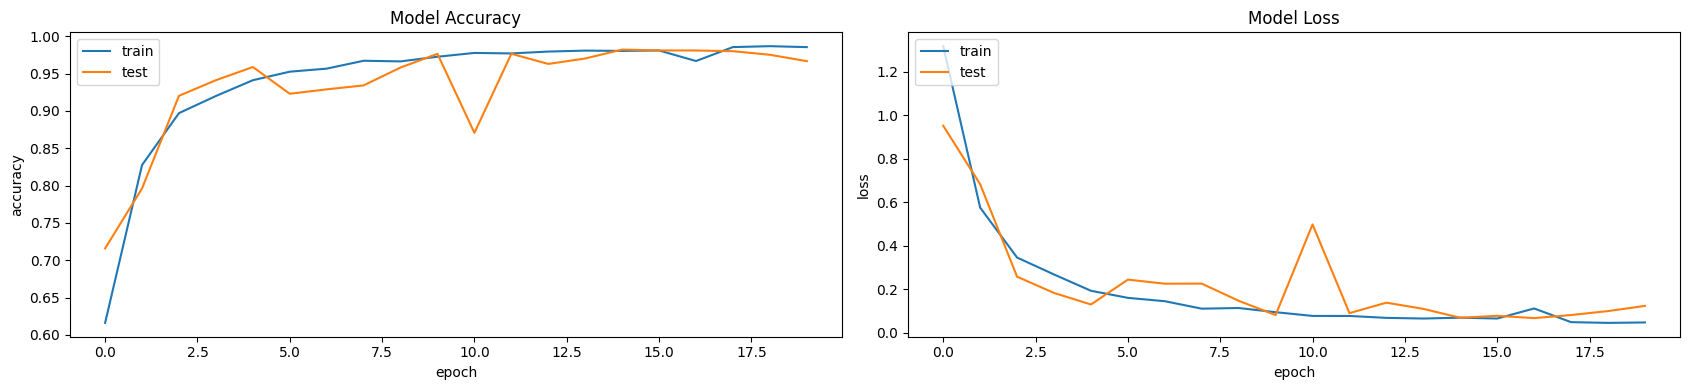

In [10]:
acc_loss_plts(history)

In [11]:
# Training Dataset
loss , accuracy = model3.evaluate(train_ds)
print("Accuracy is == ",accuracy)
print("Loss is == ",loss)

1678/1678 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9938 - loss: 0.0175
Accuracy is ==  0.9939843416213989
Loss is ==  0.017322905361652374


In [12]:
# Validation dataset
loss , accuracy = model3.evaluate(val_ds)
print("Accuracy is == ",accuracy)
print("Loss is == ",loss)

378/378 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9678 - loss: 0.1208
Accuracy is ==  0.96660315990448
Loss is ==  0.12283024191856384


In [13]:
# Testing Dataset
loss , accuracy = model3.evaluate(test_ds)
print("Accuracy is == ",accuracy)
print("Loss is == ",loss)

43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9625 - loss: 0.1467
Accuracy is ==  0.9653902649879456
Loss is ==  0.1452869027853012


In [14]:
# getting the predictions form the model
predictions = model3.predict(test_ds)

predictions = np.argmax(predictions,axis=1)

10/43 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

W0000 00:00:1723262510.527920     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [15]:
# Getting the true labels in test_ds for comparision
y_test = []
for img,labels in test_ds:
    for row in labels:
        y_test.append((np.argmax(row)))
y_test = np.array(y_test)

In [16]:
# Classification Report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        50
           1       0.98      1.00      0.99        44
           2       0.98      0.94      0.96        51
           3       1.00      0.96      0.98        51
           4       0.96      0.96      0.96        48
           5       1.00      0.98      0.99        50
           6       1.00      1.00      1.00        46
           7       0.93      1.00      0.97        43
           8       0.86      0.93      0.89        45
           9       0.98      1.00      0.99        48
          10       0.98      1.00      0.99        47
          11       0.93      0.88      0.90        48
          12       1.00      1.00      1.00        48
          13       1.00      1.00      1.00        48
          14       0.98      1.00      0.99        43
          15       0.90      1.00      0.95        43
          16       0.98      0.96      0.97        46
          17       0.98    

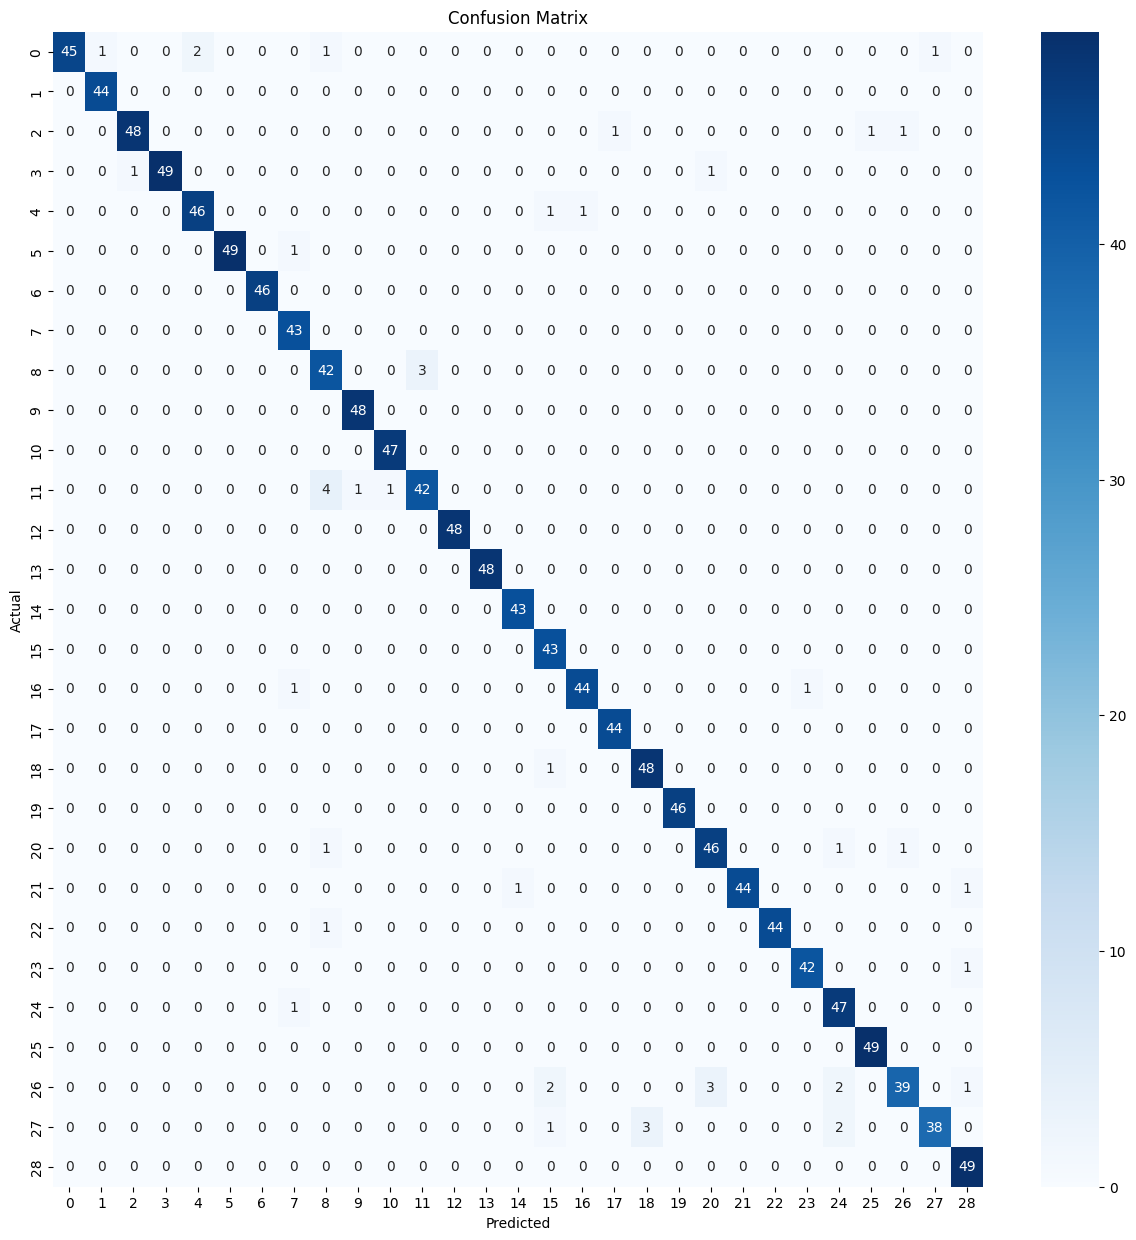

In [17]:
# Plotting the confusion matrix 
plt.figure(figsize=(15,15))
sns.heatmap(data=confusion_matrix(y_test,predictions),
            annot=True, fmt='',cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [4]:
# Saving the model in a keras file 
model.save('my_model.keras')

NameError: name 'model' is not defined